# Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?


A quick glance at the google sheet shows that there are a few instances of a customer ordering 2000 total items. Let's take a look at the distribution of the data to understand the data better.

### Import [Shopify Sneaker Data Set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('2019 Winter Data Science Intern Challenge Data Set').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
sneakers = pd.DataFrame.from_records(rows)
sneakers

,0,1,2,3,4,5,6
0,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1,1,53,746,224,2,cash,2017-03-13 12:36:56
2,2,92,925,90,1,cash,2017-03-03 17:38:52
3,3,44,861,144,1,cash,2017-03-14 4:23:56
4,4,18,935,156,1,credit_card,2017-03-26 12:43:37
...,...,...,...,...,...,...,...
4996,4996,73,993,330,2,debit,2017-03-30 13:47:17
4997,4997,48,789,234,2,cash,2017-03-16 20:36:16
4998,4998,56,867,351,3,cash,2017-03-19 5:42:42
4999,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


If you take a look, the data has our desired headers as the first row of the dataframe. Let's fix that.

In [ ]:
# Grab the first row for the header
headers = sneakers.iloc[0]
# Take the data less the header row
sneakers = sneakers[1:]
# Set the header row as the df header
sneakers.columns = headers
sneakers.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1,1,53,746,224,2,cash,2017-03-13 12:36:56
2,2,92,925,90,1,cash,2017-03-03 17:38:52
3,3,44,861,144,1,cash,2017-03-14 4:23:56
4,4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Great! Now, let's confirm the AOV is approximately 3000 $.

In [ ]:
round(sneakers.loc[:,'order_amount'].sum(axis = 0)/len(sneakers), 2)

3145.13

Awesome. Now that all that's set let's take a look at the data.


## Explore the data

Let's take a look at the type of data we're working with

In [ ]:
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 1 to 5000
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   object
 1   shop_id         5000 non-null   object
 2   user_id         5000 non-null   object
 3   order_amount    5000 non-null   object
 4   total_items     5000 non-null   object
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: object(7)
memory usage: 273.6+ KB


The data types of each column are objects however, we want to create distributions of some of the columns, namely the shop_id (to gauge the traffic at each shop), order_amount (to gauge the total costs of orders) and the total_items (to gauge the amount of items per order). The latter is of particular interest as it is used to calculate AOV via:

Therefore, let's first convert the objects to numerical data which is simply through the use of the to_numeric() method included in pandas

In [ ]:
sneakers["shop_id"] = pd.to_numeric(sneakers.loc[:,'shop_id'])
sneakers["order_amount"] = pd.to_numeric(sneakers.loc[:,'order_amount'])
sneakers["total_items"] = pd.to_numeric(sneakers.loc[:,'total_items'])
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 1 to 5000
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   object
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   object
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

With our data now as integers, we can use the hist() method on the sneakers dataframe to check out how these variables are distributed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d4b3b41d0>,
      dtype=object)

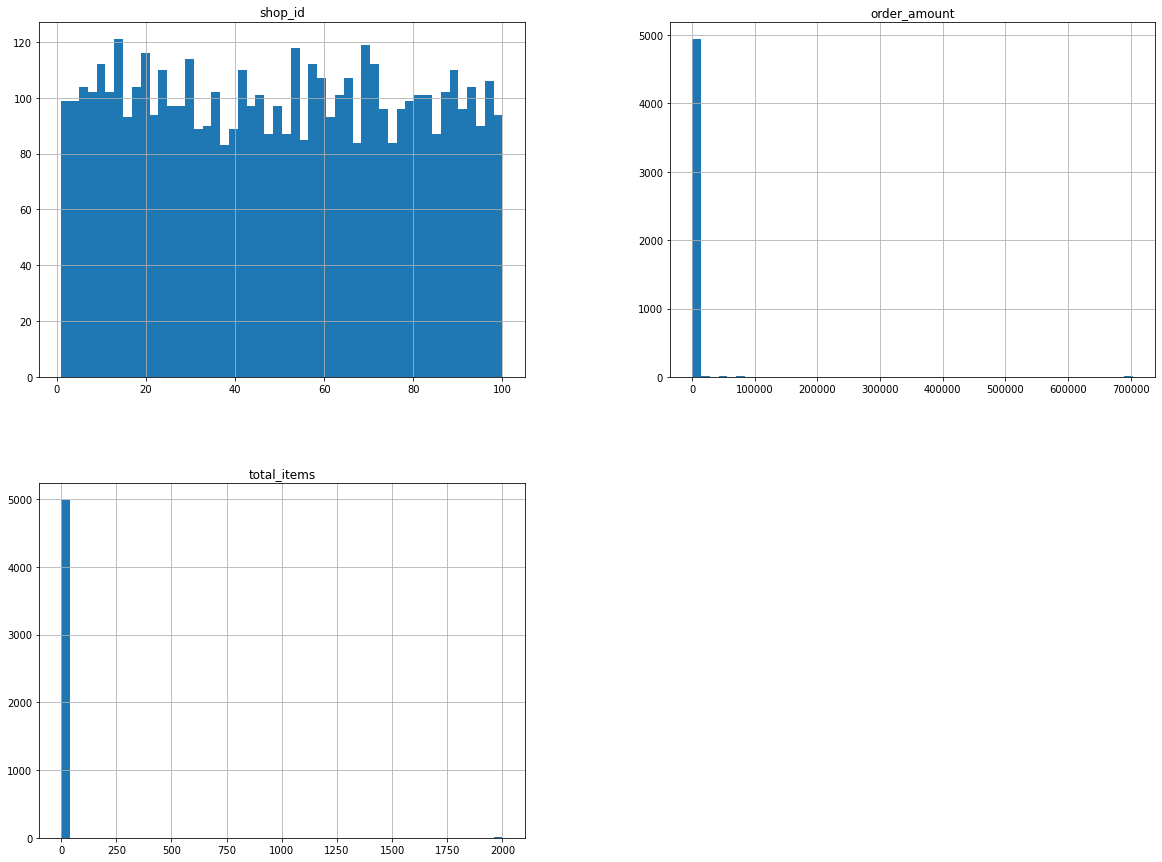

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sneakers.hist(bins=50, figsize=(20,15))


Looking at the histogram for the shop_id plot shows that all these different shops receive similar traffic. 

Now, turning attention to total_items, there seems to be a few instances in which a customer ordered approximately 2000 items in a single order! This might be due to re-sellers who purchase from particular e-shops and sell locally. Regardless of the reason, the presence of each would definitely skew our naive calculation of AOV towards a much higher value than what the average and our understanding of normal distributions would suggest. These data points are not representative of the general data and may actually inhibit our ability to model and interpret the data. In other words, assuming we are interested in using the AOV for use in analyzing the typical customer, inclusion of these outliers would be to the model's detriment so let's get rid of them. The question now becomes what numerical threshold should be applied as a filter (e.g. total_items < threshold) to the total_items to seperate the outliers. Since customers do not typically buy more than a couple pair of sneakers at a time, let's set this threshold to 10 first and peek at the data to again check the distribution of total_items.

In [ ]:
clean_sneakers = sneakers[sneakers["total_items"] < 10]
clean_sneakers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4983 entries, 1 to 5000
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        4983 non-null   object
 1   shop_id         4983 non-null   int64 
 2   user_id         4983 non-null   object
 3   order_amount    4983 non-null   int64 
 4   total_items     4983 non-null   int64 
 5   payment_method  4983 non-null   object
 6   created_at      4983 non-null   object
dtypes: int64(3), object(4)
memory usage: 311.4+ KB


Great! It looks like there were 17 entries which exceeded 10 items. 

Let's replot our histogram for the order_amount to get a fresh histogram from our filtered data. Furthermore let's use pandas' describe method to get some valuable information about the data.



,shop_id,order_amount,total_items
count,4983.000000,4983.000000,4983.00000
mean,50.106362,754.091913,1.99398
std,29.051718,5314.092293,0.98318
min,1.000000,90.000000,1.00000
25%,24.000000,163.000000,1.00000
50%,50.000000,284.000000,2.00000
75%,75.000000,390.000000,3.00000
max,100.000000,154350.000000,8.00000


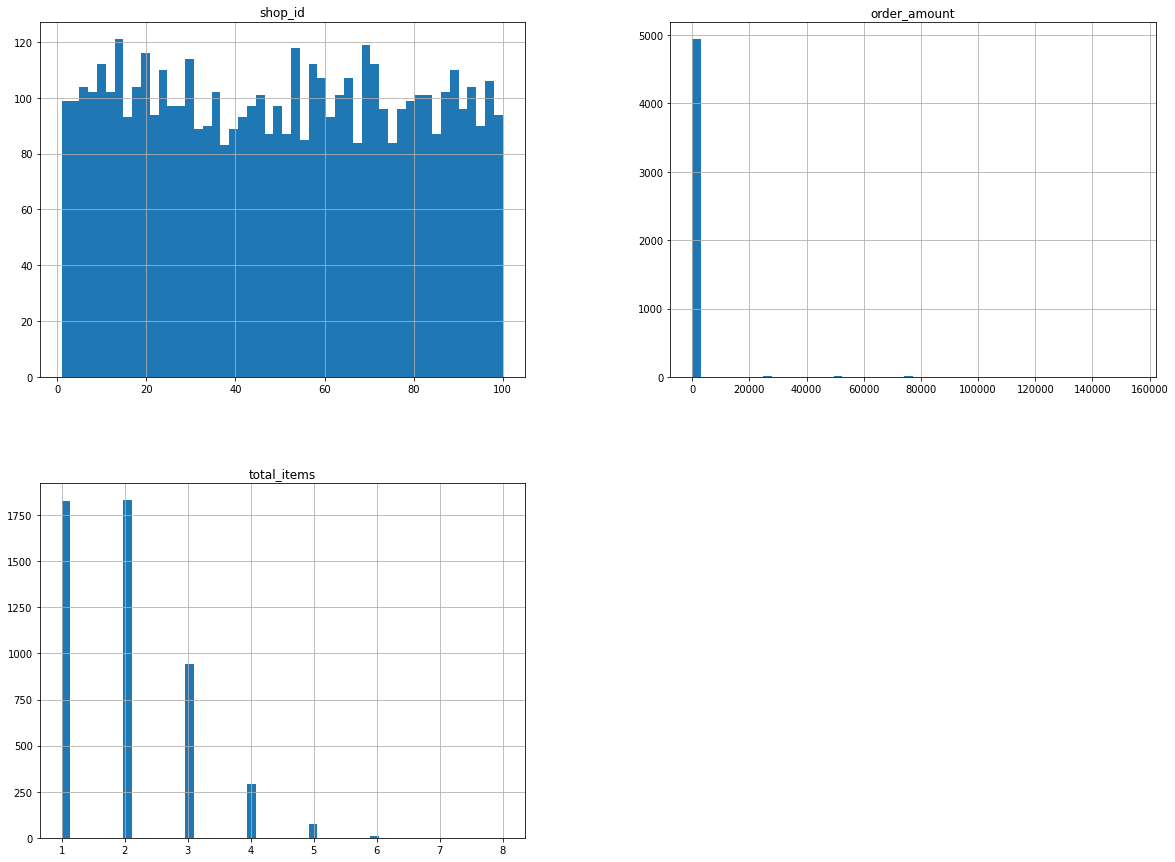

In [ ]:
clean_sneakers.hist(bins=50, figsize=(20,15))
clean_sneakers.describe()

Great! total_items seems to have a more familiar and normal looking distribution now. It is skewed to the lower digits however, which makes sense as sneakers aren't an item which the average customer typically buys a surplus of. 

Finally let's turn our attention to our order_amount histogram. Here, we notice a few things, in particular, there are a few orders whose prices are through the roof (> 20,000)! I would personally place a pair of sneakers between 50 at minimum and 300 at maximum. Using these numbers along with the table created by the describe method above as a reference, we can see that even if we bought 8 pairs of sneakers - the maximum number in the total_items column - the cost shouldn't exceed 2,400 $ (i.e. 8*300 = 2400), however, the histogram shows order_amounts appoximately 10 times this amount or even higher. Therefore, there are a few sneakers sold by shops which are extremely expensive relative to the common pair of shoes. Re-iterating the previous text-block, we should filter this data out as they are not good representatives of this population. Therefore, let's remove these points as well using an order_amount threshold of 2500, 100 more than our estimate to loosen our filterig condition slightly.

In [ ]:
cleaner_sneakers = clean_sneakers[sneakers["order_amount"] < 2500]
cleaner_sneakers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4937 entries, 1 to 5000
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        4937 non-null   object
 1   shop_id         4937 non-null   int64 
 2   user_id         4937 non-null   object
 3   order_amount    4937 non-null   int64 
 4   total_items     4937 non-null   int64 
 5   payment_method  4937 non-null   object
 6   created_at      4937 non-null   object
dtypes: int64(3), object(4)
memory usage: 308.6+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


46 Entries were removed. Let's see our histograms once more.

,shop_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000
mean,49.846465,302.580514,1.994734
std,29.061131,160.804912,0.982821
min,1.000000,90.000000,1.000000
25%,24.000000,163.000000,1.000000
50%,50.000000,284.000000,2.000000
75%,74.000000,387.000000,3.000000
max,100.000000,1760.000000,8.000000


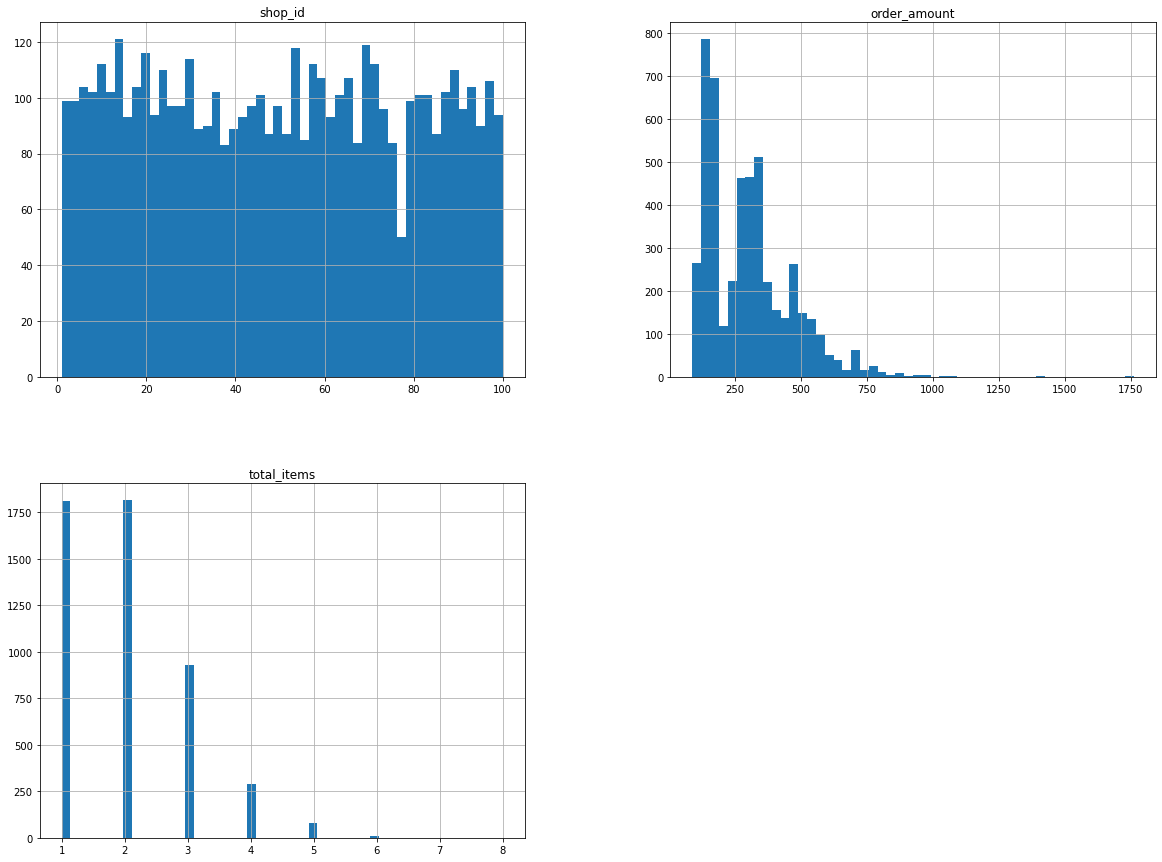

In [ ]:
cleaner_sneakers.hist(bins=50, figsize=(20,15))
cleaner_sneakers.describe()

Excellent! Our order_amount has a more familiar and normal distribution. Again it is skewed to the left which makes sense given the total_item is also skewed in the same manner as the order_amount is propotional to the total_items bought. Using our cleaned up dataframe, 'cleaner_sneakers', let's recalcalculate the AOV.

## Recalculate AOV

In [ ]:
round(cleaner_sneakers.loc[:,'order_amount'].sum(axis = 0)/len(sneakers), 2)

298.77

The AOV is 298.77 which is definitely a more suitable AOV when gauging the typical customer! Let's move on to the questions for this section.

## Q1.1

Therefore, what was wrong with the calculation was we had a number of outliers skewing the data to ~ 3000 $.

## Q1.2

Assuming we are interested in getting a single number to represent the 100 sneaker stores over a 30-day window, we can use the median order value as it will not be skewed towards the extreme ends of the dataset with the small number of outliers present. Rather than just talk about it, let's show that this is the case for this dataset.

## Q1.3

In [ ]:
sneakers.loc[int(len(sneakers))/2, 'order_amount']

276

The median order value is 276 which captures this datasets order value as a whole much better than the AOV does (without additional filtering) and is similar in value to the AOV (with additional filtering)

## Question 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

1. How many orders were shipped by Speedy Express in total?
2. What is the last name of the employee with the most orders?
3. What product was ordered the most by customers in Germany?


## Q2.1

Taking a look at the Orders and Shippers tables shows that they are related by the ShipperID. So we can join two tables and filter to count the orders by the "Speedy Express" company alone.

In [ ]:
SELECT COUNT(*) AS NumOrders
FROM [Orders]
JOIN [Shippers]
    ON [Shippers].ShipperID = [Orders].ShipperID
WHERE [Shippers].ShipperName = 'Speedy Express'

Using this query, we know that "Speedy Express" shipped  54 items.



## Q2.2

Taking a look at the Employees and Orders tables shows they are related by the EmployeeID. So we can join the two tables, group the entries by the lastname of the employee who fulfilled the order in descending order and taking the top entry of the resultant table. 

In [ ]:
SELECT [Employees].LastName, COUNT(*) AS NumOrders
FROM [Orders]
JOIN [Employees]
ON [Orders].EmployeeID = [Employees].EmployeeID
GROUP BY [Employees].LastName
ORDER BY NumOrders DESC
LIMIT 1

Using this query, we know that the last name of the employee with the most orders is "Peacock" with 40 orders.

## Q2.3

This question is a little more involved. In order to determine the product ordered the most in Germany we need to ...

* somehow connect the Customers table to the Products table where the names and ProductID can be found.

* filter the Customers table WHERE Country is Germany as this is the only table holding customer country information. 

Let's start simple with just getting all the products ordered in Germany first as we can easily get the count of each product after this (described in the next text block).

To accomplish the first point we need to distinguish the relationship between Customers and Products. Looking through the tables we can find the following relationship:

Customers <-- OrderDetails --> Orders --> Products

In words...
* The Customers table primary key is a foreign key of the OrderDetails table, namely the CustomerID column
* The Orders table primary key is a foreign key of the OrderDetails table, namely the OrderID column
* The products table primary key is a foreign key of the Orders table, namely the ProductsID column

Therefore we know we will have to join the Customers table to the Products table using the OrderDetails and Orders tables acting as junctions through the keys mentioned above.

To accomplish the second bullet point, we can simply use the WHERE keyword following our JOIN operations to filter for products bought from Customers in Germany.

Using our knowledge so far we can write the following query to get a table of all the Products ordered in Germany.


In [ ]:
SELECT [Products].ProductName
FROM [Orders]
JOIN [Customers]
    ON [Customers].CustomerID = [Orders].CustomerID
JOIN [OrderDetails]
    ON [OrderDetails].OrderID = [Orders].OrderID
JOIN [Products]
    ON [Products].ProductID = [OrderDetails].ProductID
WHERE [Customers].Country = 'Germany'
GROUP BY [OrderDetails].ProductID

That's great! However, we are interested in the product ORDERED THE MOST in Germany. Therefore, we need to somehow get a count of total quantity of each product bought in Germany. If we look at the OrderDetails table, we find the key for the quantity of each product bought. Therefore we can simply call the SUM function on the Quantity key in this table and have it display with SELECT.

In [ ]:
SELECT [Products].ProductName,
    SUM([OrderDetails].Quantity) AS NumOrders
FROM [Orders]
JOIN [Customers]
    ON [Customers].CustomerID = [Orders].CustomerID
JOIN [OrderDetails]
    ON [OrderDetails].OrderID = [Orders].OrderID
JOIN [Products]
    ON [Products].ProductID = [OrderDetails].ProductID
WHERE [Customers].Country = 'Germany'
GROUP BY [OrderDetails].ProductID
ORDER BY NumOrders DESC
LIMIT 1

Using this query, we know that the product ordered the most in Germany is Boston Crab Meat with 160 orders recorded.

That's all folks!